##CONFIGURACIÓN DEL ENTORNO

### CARGA DE LIBRERIAS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### CARGA DE LOS DATOS

Antes de continuar deberás:

* Haber descargado los datos de la plataforma

* Haberlos descomprimido en alguna carpeta de tu disco duro

* Haberlos subido a Colab mediante el explorador de archivos (icono de carpeta - icono de subir archivo)

In [ ]:
df = pd.read_csv('AbandonoEmpleados.csv', sep = ';', index_col= 'id', na_values='#N/D')

In [ ]:
df

##BUSINESS ANALITYCS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

###ANALISIS DE NULOS

In [ ]:
df.isna().sum().sort_values(ascending = False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

Conclusiones:


*  anos_en_puesto y conciliacion tienen demasiados nulos --> eliminamos la Variable



*   sexo, educacion, satisfaccion_trabajo e implicacion --> los imputamos tras EDA



In [ ]:
df.drop(columns = ['anos_en_puesto','conciliacion'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

###EDA VARIABLES CATEGORICAS

In [ ]:
def graficos_eda_categoricos(cat):
  #Calculamos el numero de filas que necesitamos
  from math import ceil
  filas = ceil(cat.shape[1]/2)

  #Definimos el gráfico
  f, ax = plt.subplots(nrows = filas, ncols = 2 , figsize = (16, filas *6))

  #Aplanamos para iterar por el gráfico como si fuera de una dimension en lugar de 2
  ax = ax.flat

  #Creamos el bucle que va añadiendo gráficos
  for cada, variable in enumerate(cat):
    cat[variable].value_counts().plot.barh(ax = ax[cada])
    ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
    ax[cada].tick_params(labelsize = 12)

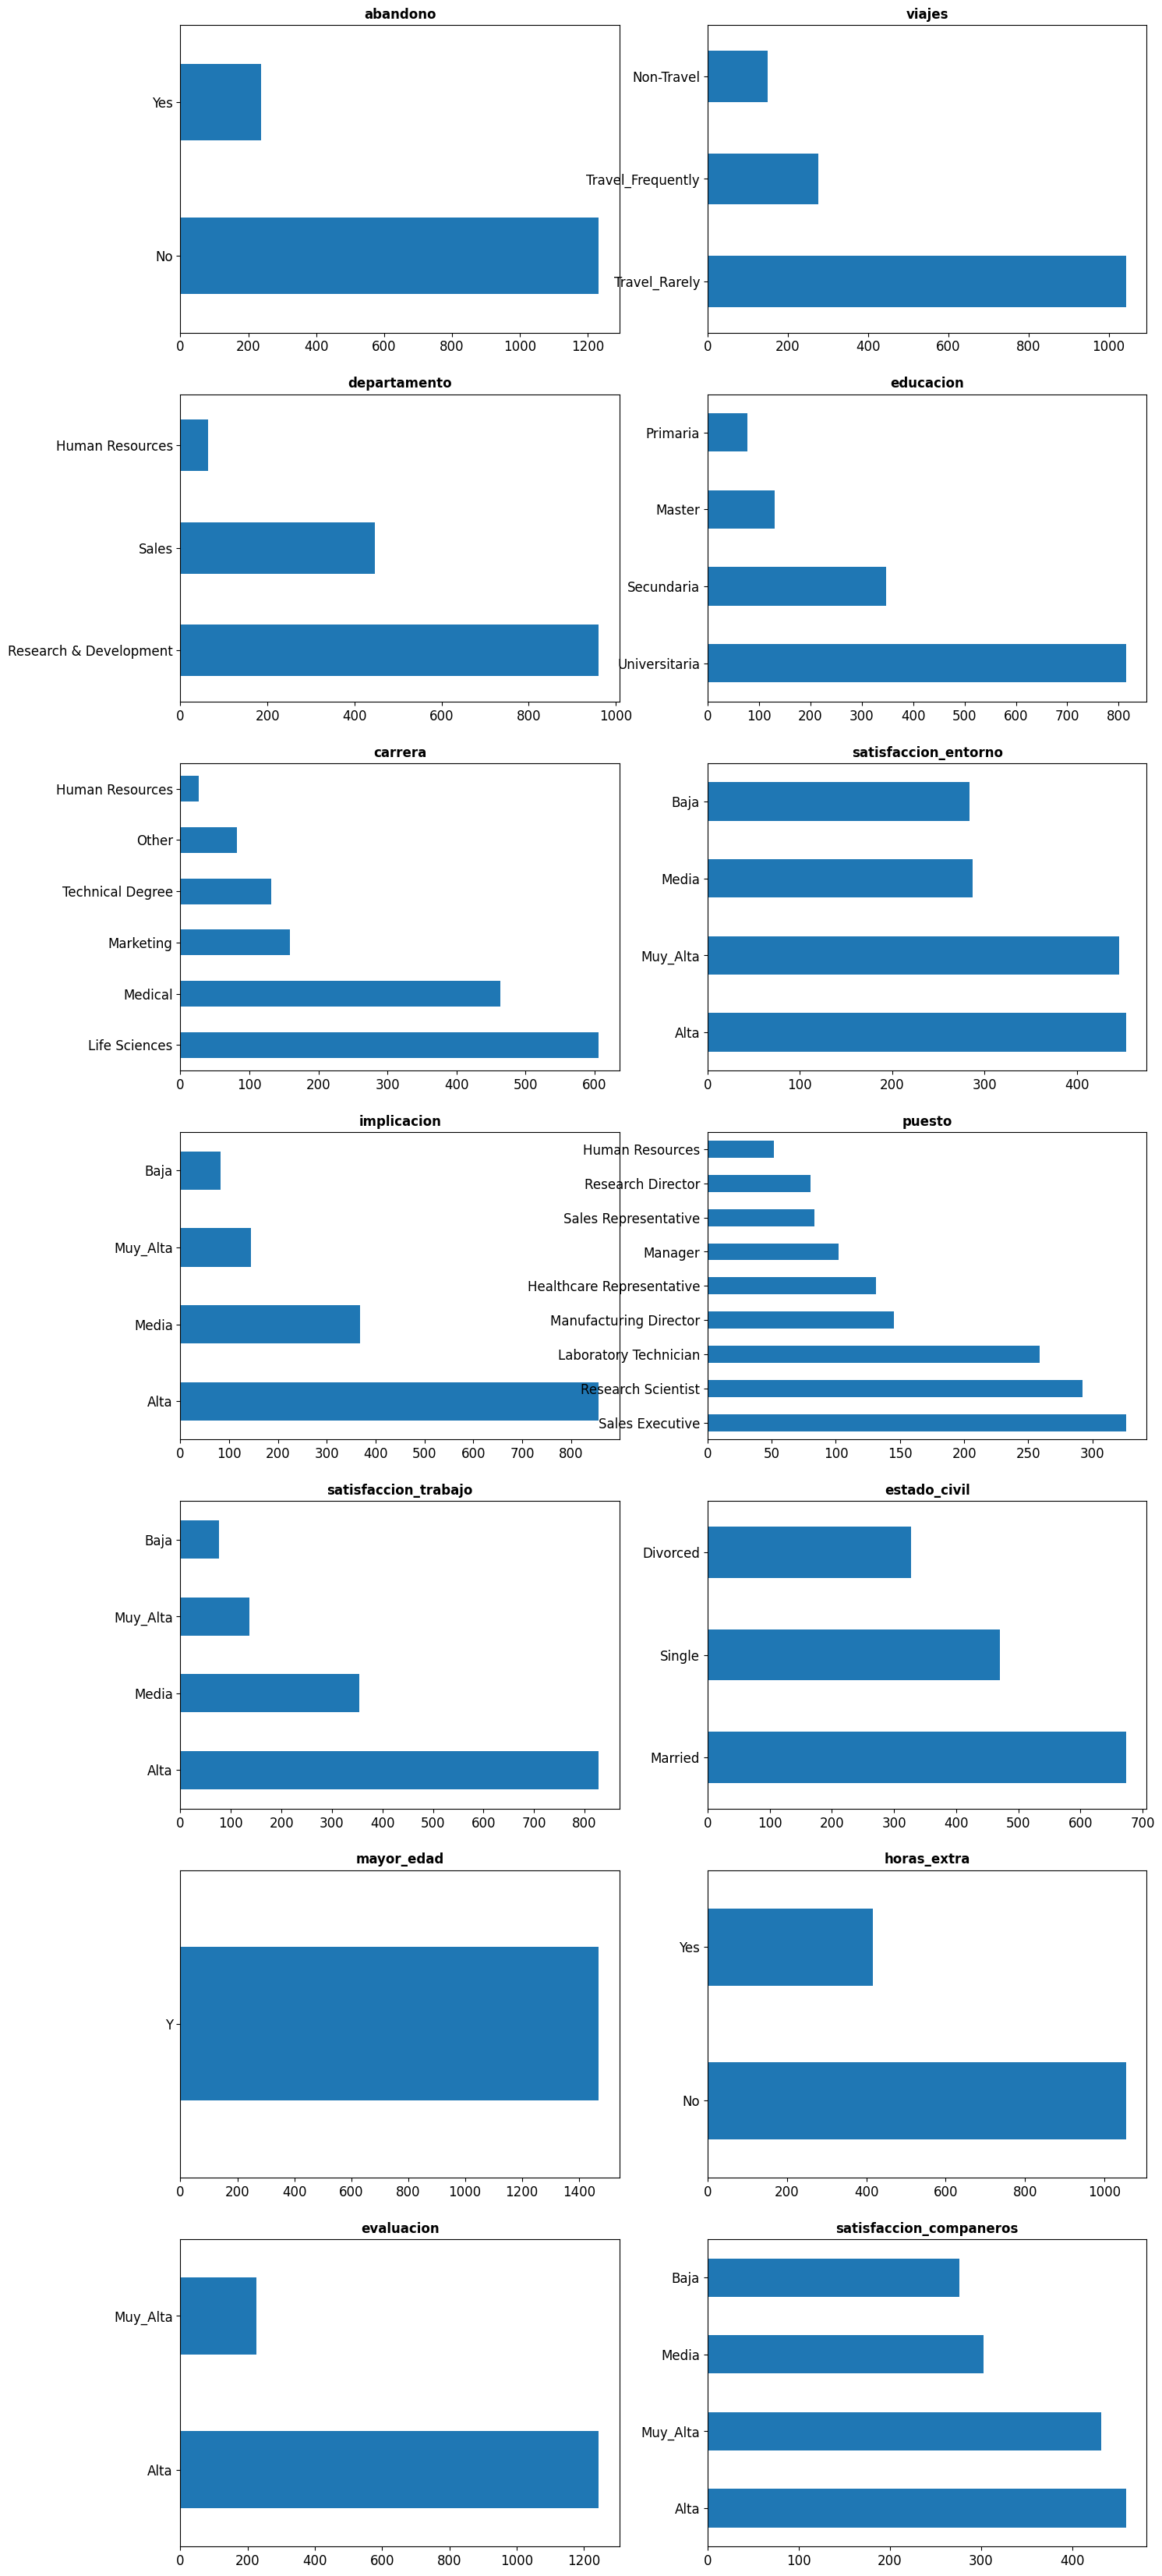

In [ ]:
graficos_eda_categoricos(df.select_dtypes('O'))

Conclusiones:
*   La vble mayor_edad solo tiene un valor --> eliminar la vble
*   Sobre las imputaciones pendientes de variables categoricas:

  *   educacion: imputar por 'Universitaria' (>80%)
  *   satisfaccion_trabajo: imputar por 'Alta' (>80%)
  *   implicacion: imputar por 'Alta' (>80%)

In [ ]:
df.drop(columns = 'mayor_edad', inplace = True)

df['educacion'] = df['educacion'].fillna('Universitaria')

df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')

df['implicacion'] = df['implicacion'].fillna('Alta')

###EDA VARIABLES NUMERICAS

In [ ]:
def estadisticos_cont(num):
  #Calculamos describe
  estadisticos = num.describe().T

  #Añadimos la mediana
  estadisticos['median'] = num.median()

  #Reordenamos para que la mediana este al lado de la media
  estadisticos = estadisticos.iloc[:, [0,1,8,2,3,4,5,6,7]]

  #Lo devolvemos
  return (estadisticos)

In [ ]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


Conclusiones:


*   La variable 'empleado' tiene un solo valor --> eliminamos la variable
*   La variable 'sexo' tiene 4 valores --> eliminimos la variable
*   La variable 'horas_quincena' tiene un solo valor --> eliminamos la variable
*   De los nulos numericos pendientes de imputar solo queda la variable 'sexo', pero como la vamos a eliminar no hace falta imputarla.





In [ ]:
df.drop(columns=['empleados', 'sexo', 'horas_quincena'], inplace= True)

In [ ]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3


###GENERACION DE INSIGHTS


###Cuantificación del problema: ¿Cuál es la tasa de abandono?

In [ ]:
df.abandono.value_counts(normalize= True) * 100

No     83.877551
Yes    16.122449
Name: abandono, dtype: float64

###¿Hay un perfil de empleados que deja la empresa?

In [ ]:
# prompt: Transformar abandono a munerico

#df['abandono'] = df['abandono'].apply(lambda x: 1 if x == 'yes' else 0)

df['abandono'] = df['abandono'].map({'No':0, 'Yes':1}) # Otra solucion posible


In [ ]:
df


,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3


<Axes: xlabel='educacion'>

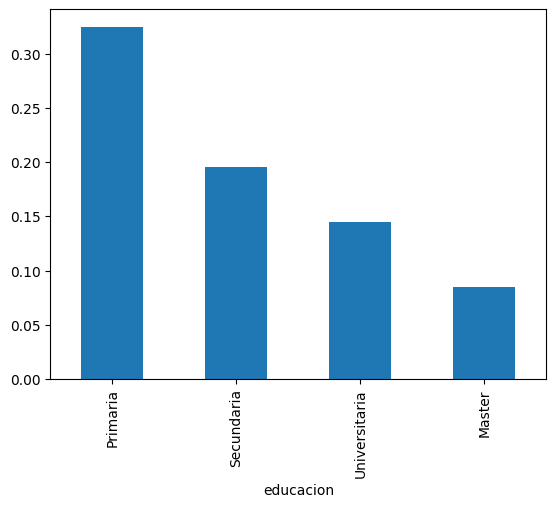

In [ ]:
# prompt: hacemos un analisis por educacion y lo mostramos de forma ascendente con un grafico de barras

df.groupby('educacion').abandono.mean().sort_values(ascending = False).plot.bar()


<Axes: xlabel='estado_civil'>

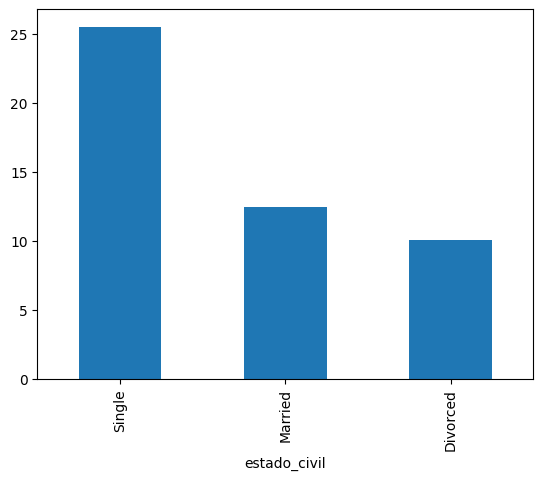

In [ ]:
#Analisis por estado civil
temp = df.groupby('estado_civil').abandono.mean().sort_values(ascending=False)* 100
temp.plot.bar()

<Axes: xlabel='horas_extra'>

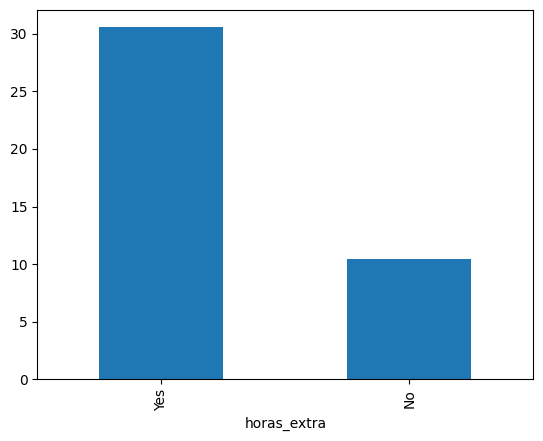

In [ ]:
#Analisis por horas extras
temp = df.groupby('horas_extra').abandono.mean().sort_values(ascending=False)* 100
temp.plot.bar()

<Axes: xlabel='puesto'>

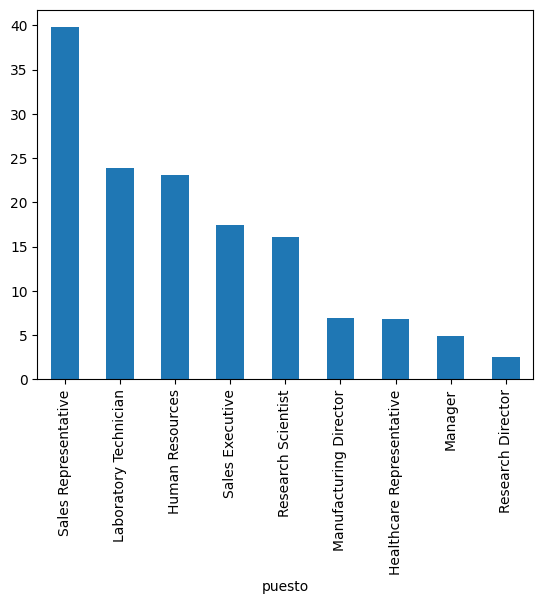

In [ ]:
#Analisis por puesto
temp = df.groupby('puesto').abandono.mean().sort_values(ascending=False)* 100
temp.plot.bar()

<Axes: xlabel='abandono'>

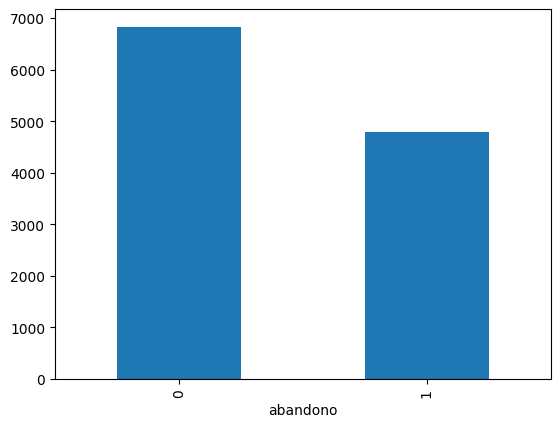

In [ ]:
#Analisis por horas extras
temp = df.groupby('abandono').salario_mes.mean()
temp.plot.bar()

Conclusiones:
El perfil medio de empleado que deja la empresa es:


1.   Bajo nivel educativo
1.   Soltero
1.   Trabajas en ventas
2.   Bajo salario
2.   Alta carga de horas extras



###¿Cual es impacto económico de este problema?

# Según el estudio "Cost of Turnover" del Center for American Progress:
       
        * El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario
        * El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario
        * El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario
        * El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [ ]:
#Creamos una nueva variable salario_ano del empleado
df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes', 'salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [ ]:
#Calculamos el impacto económico de cada empleado si deja la empres

#Lista de condiciones
condiciones = [(df['salario_ano']<= 30000),
               (df['salario_ano']> 30000) & (df['salario_ano']<= 50000),
               (df['salario_ano']> 50000) & (df['salario_ano']<= 75000),
               (df['salario_ano']> 75000)]

#Lista de resultados
resultados = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]

#Aplicamos select
df['impacto_abandono'] = np.select(condiciones, resultados, default =-999)

df


,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


In [ ]:
df[['salario_ano', 'impacto_abandono']]

,salario_ano,impacto_abandono
id,,
1,71916,14670.864
2,61560,12558.240
4,25080,4037.880
5,34908,6876.876
7,41616,8198.352
...,...,...
2061,30852,6077.844
2062,119892,25177.320
2064,73704,15035.616


###¿Cuanto nos ha costado este problema en el ultimo año?

In [ ]:
coste_total = df.loc[df.abandono==1].impacto_abandono.sum()
coste_total

2719005.912

###¿Cuanto nos cuesta que los empleados no esten motivados? (Perdidas en implicacion == Baja)

In [ ]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()


368672.688

###¿Cuanto dinero podriamos ahorrar fidelizando mejor a nuestros empleados?

In [ ]:
print(f"Reducir un 10% de la fuga de emleados nos ahorraria $ {int(coste_total * 0.1)} cada año")

print(f"Reducir un 20% de la fuga de emleados nos ahorraria $ {int(coste_total * 0.2)} cada año")

print(f"Reducir un 30% de la fuga de emleados nos ahorraria $ {int(coste_total * 0.3)} cada año")

Reducir un 10% de la fuga de emleados nos ahorraria $ 271900 cada año
Reducir un 20% de la fuga de emleados nos ahorraria $ 543801 cada año
Reducir un 30% de la fuga de emleados nos ahorraria $ 815701 cada año


###Y podemos seguir trazando estrategias asociadas a los insight de abandono:
Habiamos visto que los representantes de ventas son el puesto que mas se van. ¿Tendria sentido hacer un pan especifico para ellos? ¿Cual seria el coste ahorrado si disminuimos la fuga en un 30%?

Primero calculamos el % de representantes de ventas que se han ido el año pasado


In [ ]:
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1 )])
porc_pasado = abandonos_repre_pasado / total_repre_pasado

porc_pasado


0.39759036144578314

Ahora estimaremos cuantos se nos irian este año

In [ ]:
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)

se_iran

19

Sobre ellos cuantos podemos retener (hipótesis 30%) y cuanto dinero puede suponer  

In [ ]:
retenemos = int(se_iran * 0.3)

ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0), 'impacto_abandono'].sum() * porc_pasado *0.3

print(f'Podemos retener {retenemos} representante de ventas y ello supondria ahorrar $ {ahorramos}.')

Podemos retener 5 representante de ventas y ello supondria ahorrar $ 37447.22424578312.


Este dato esmuy interesnate por que nos permite determinar el presupuesto para acciones de retencion por departamento o perfil.
Ya sabemos que podemos gastarnos hasta $37.000 solo en acciones especificas para retener al represenatnte de ventas y se estarian pagando solas con la perdida evitada.

##MODELO DE MACHINE LEARNING

In [ ]:
df_ml = df.copy()


In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empr

### PREPARACION DE LOS DATOS PARA LA MODELIZACIÓN

#### Transformar todas las variables categoricas a numericas

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#Seleccionamos las variables Categoricas
cat = df_ml.select_dtypes('O')

#Instanciamos las variables
ohe = OneHotEncoder(sparse = False)

#Entrenamos
ohe.fit(cat)

#Aplicamos
cat_ohe = ohe.transform(cat)

#Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns= ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
cat_ohe

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


####Dataframe final

Seleccionamos las variables numericas para poder juntarlas con las cat_hoe

In [ ]:
num = df.select_dtypes('number').reset_index(drop = True)

Las juntamos en el dataframe final

In [ ]:
df_ml = pd.concat([cat_ohe, num], axis = 1)
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720


###DISEÑO DE LA MODELIZACIÓN

Separación de variables predictoras y target

In [ ]:
x = df_ml.drop(columns = 'abandono')
y = df_ml['abandono']

Separacion del conjunto de datos de entrenamiento (train) y de testeo (test)

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)

##ENTRENAMIENTODEL MODELO SOBRE EL CONJUNTO DE ENTRENAMIENTO

In [ ]:
# prompt: ENTRENAMIENTODEL MODELO SOBRE EL CONJUNTO DE ENTRENAMIENTO

#Importamos el modelo
from sklearn.tree import DecisionTreeClassifier

#Instanciamos el modelo
ac = DecisionTreeClassifier(max_depth = 4)

#Entrenamos el modelo
ac.fit(train_x, train_y)


DecisionTreeClassifier(max_depth=4)

##PREDICCIÓN Y VALIDACIÓN SOBRE EL CONJUNTO DE DATOS DE TEST

In [ ]:
#Predicción
pred = ac.predict_proba(test_x) [:,1]
pred[:20]

array([0.75      , 0.05327869, 0.05825243, 0.05825243, 0.05825243,
       0.07792208, 0.05327869, 0.05327869, 0.53846154, 0.05327869,
       0.05327869, 0.05327869, 0.05327869, 1.        , 0.05327869,
       0.53846154, 0.05327869, 0.26666667, 0.05327869, 0.05327869])

In [ ]:
#Evaluación
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y, pred)

0.698081596582959

##INTERPRETACIÓN

Diagrama de árbol


[Text(0.5267857142857143, 0.9, 'node #0\nanos_compania <= 2.5\nsamples = 100.0%\nvalue = [0.84, 0.16]'),
 Text(0.2857142857142857, 0.7, 'node #1\nedad <= 32.5\nsamples = 21.4%\nvalue = [0.67, 0.33]'),
 Text(0.14285714285714285, 0.5, 'node #2\nnivel_acciones <= 0.5\nsamples = 10.0%\nvalue = [0.5, 0.5]'),
 Text(0.07142857142857142, 0.3, 'node #3\npuesto_Research Scientist <= 0.5\nsamples = 5.6%\nvalue = [0.36, 0.64]'),
 Text(0.03571428571428571, 0.1, 'node #4\nsamples = 3.9%\nvalue = [0.25, 0.75]'),
 Text(0.10714285714285714, 0.1, 'node #5\nsamples = 1.7%\nvalue = [0.61, 0.39]'),
 Text(0.21428571428571427, 0.3, 'node #6\nimpacto_abandono <= 11703.89\nsamples = 4.4%\nvalue = [0.69, 0.31]'),
 Text(0.17857142857142858, 0.1, 'node #7\nsamples = 4.2%\nvalue = [0.72, 0.28]'),
 Text(0.25, 0.1, 'node #8\nsamples = 0.2%\nvalue = [0.0, 1.0]'),
 Text(0.42857142857142855, 0.5, 'node #9\nhoras_extra_No <= 0.5\nsamples = 11.4%\nvalue = [0.81, 0.19]'),
 Text(0.35714285714285715, 0.3, 'node #10\nsatisfa

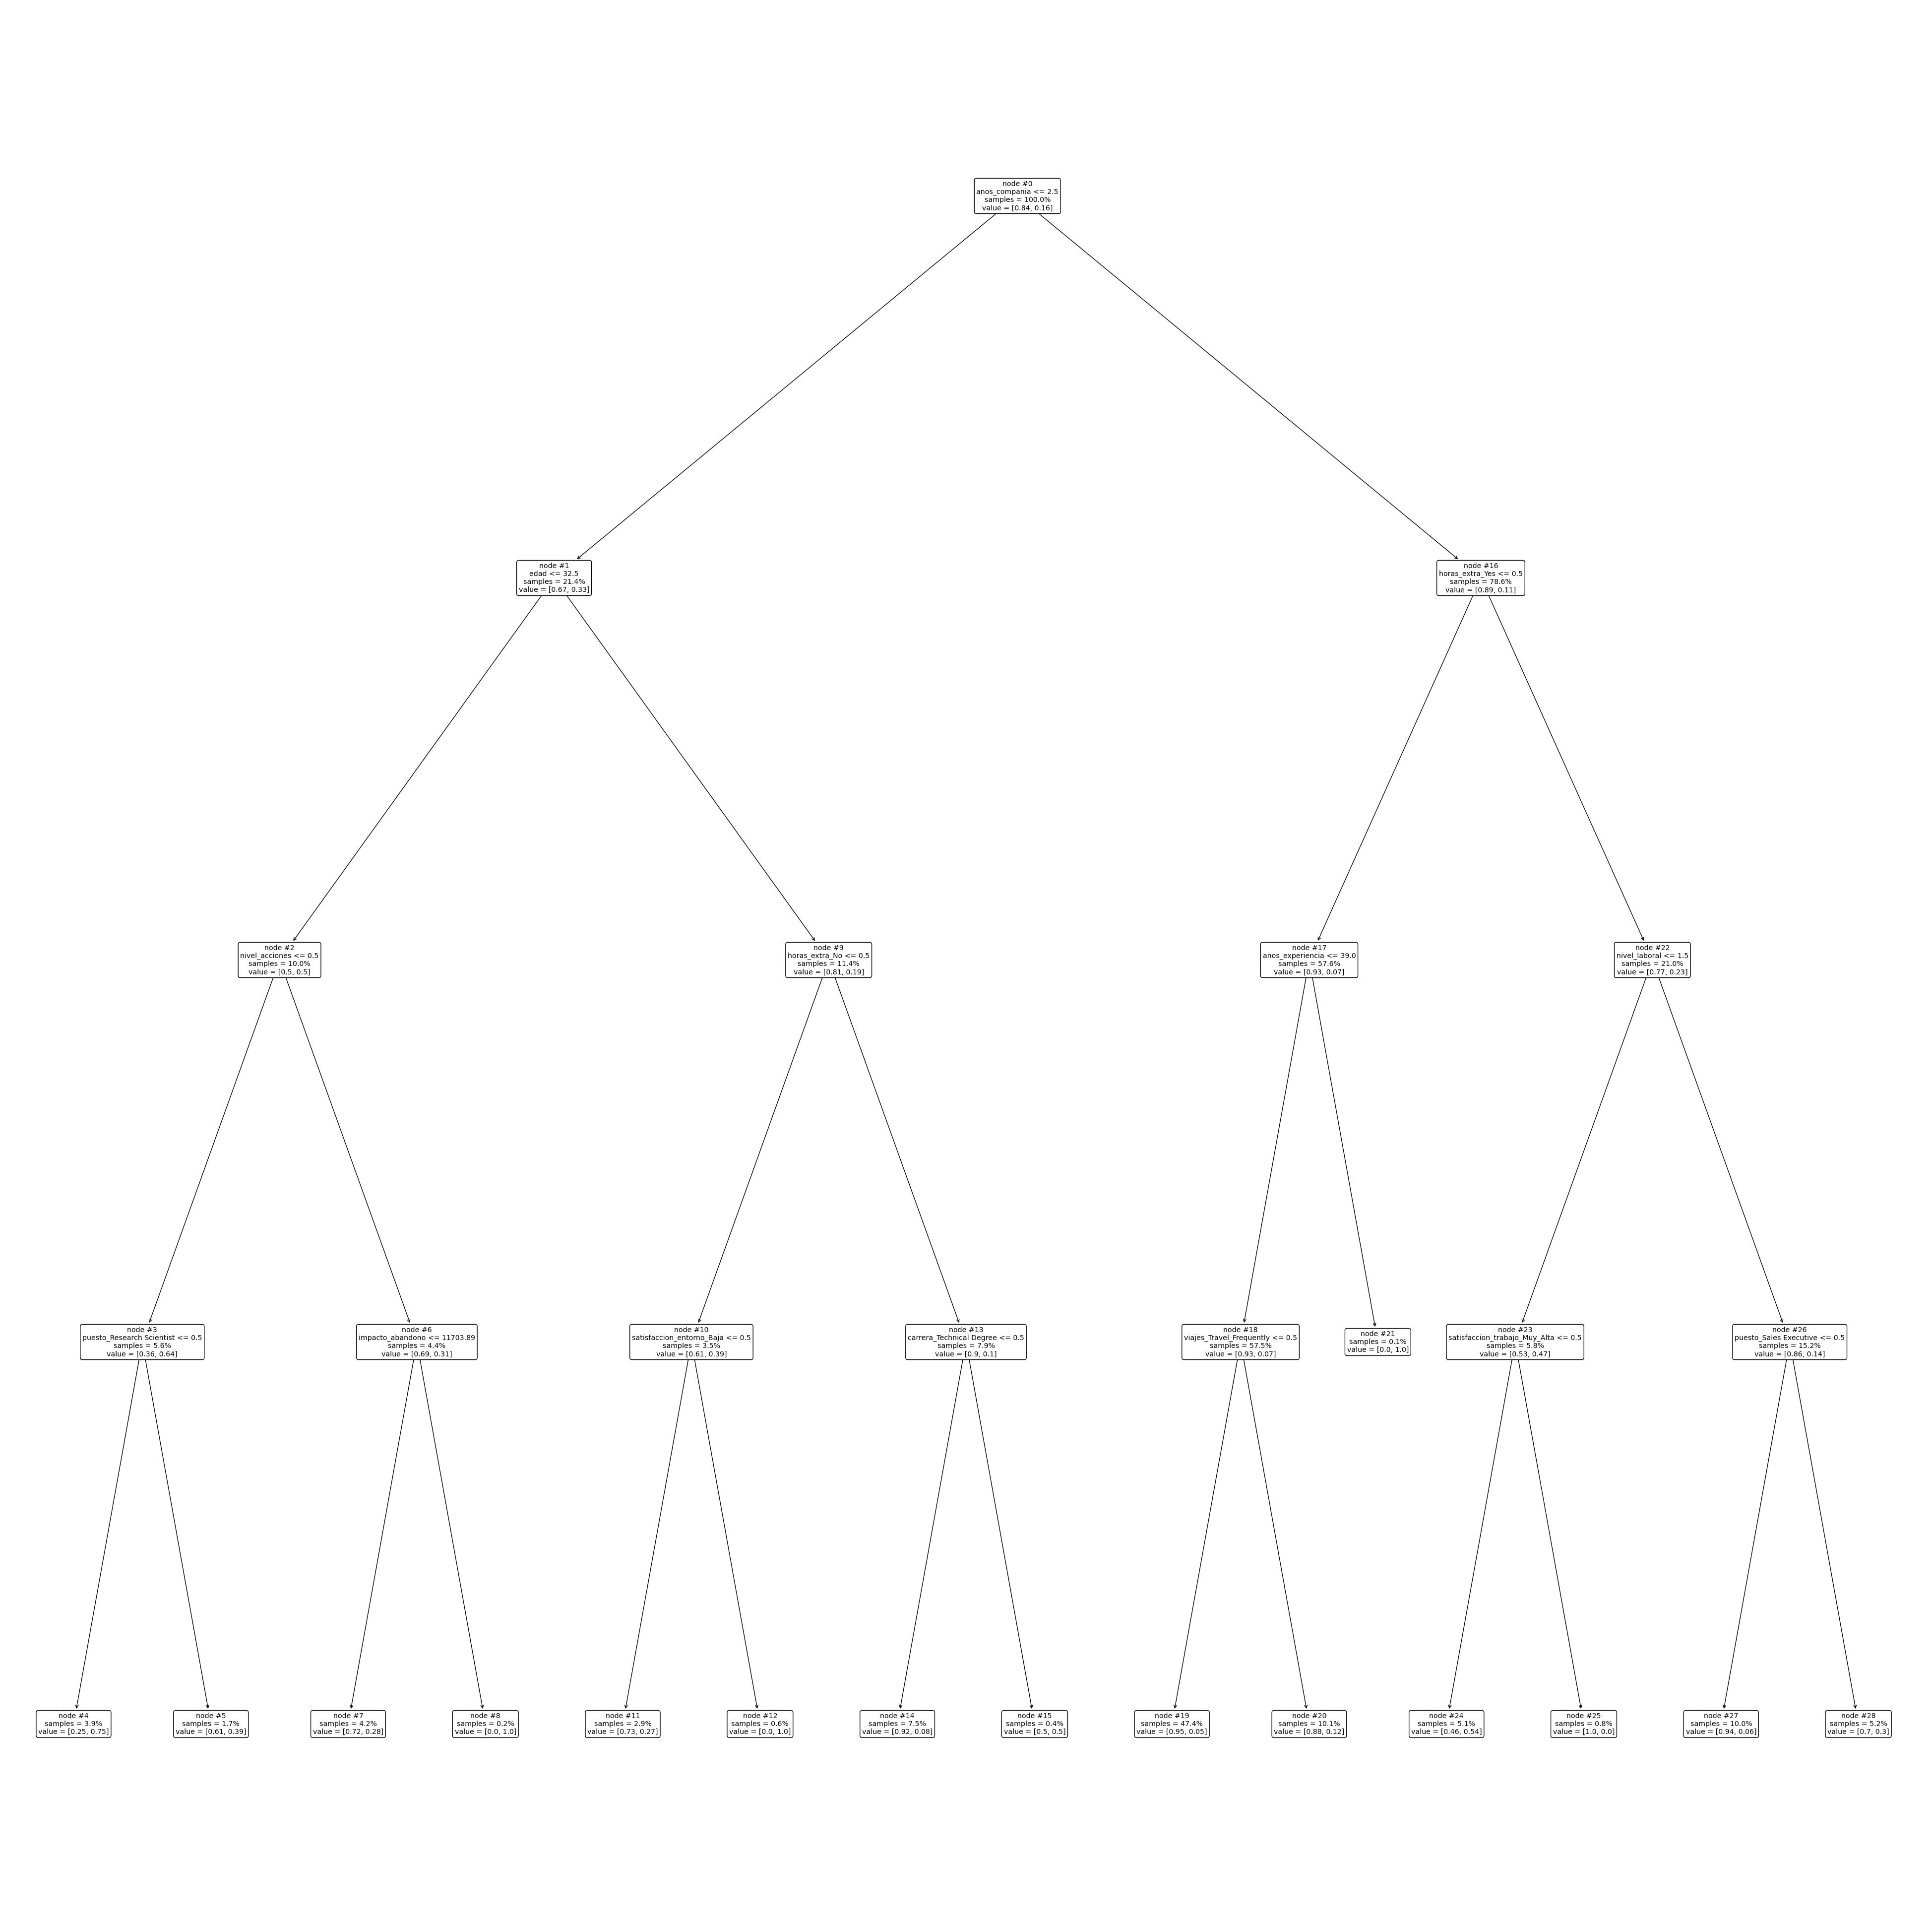

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(ac,
          feature_names = test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2)

Importacia de variables

<Axes: >

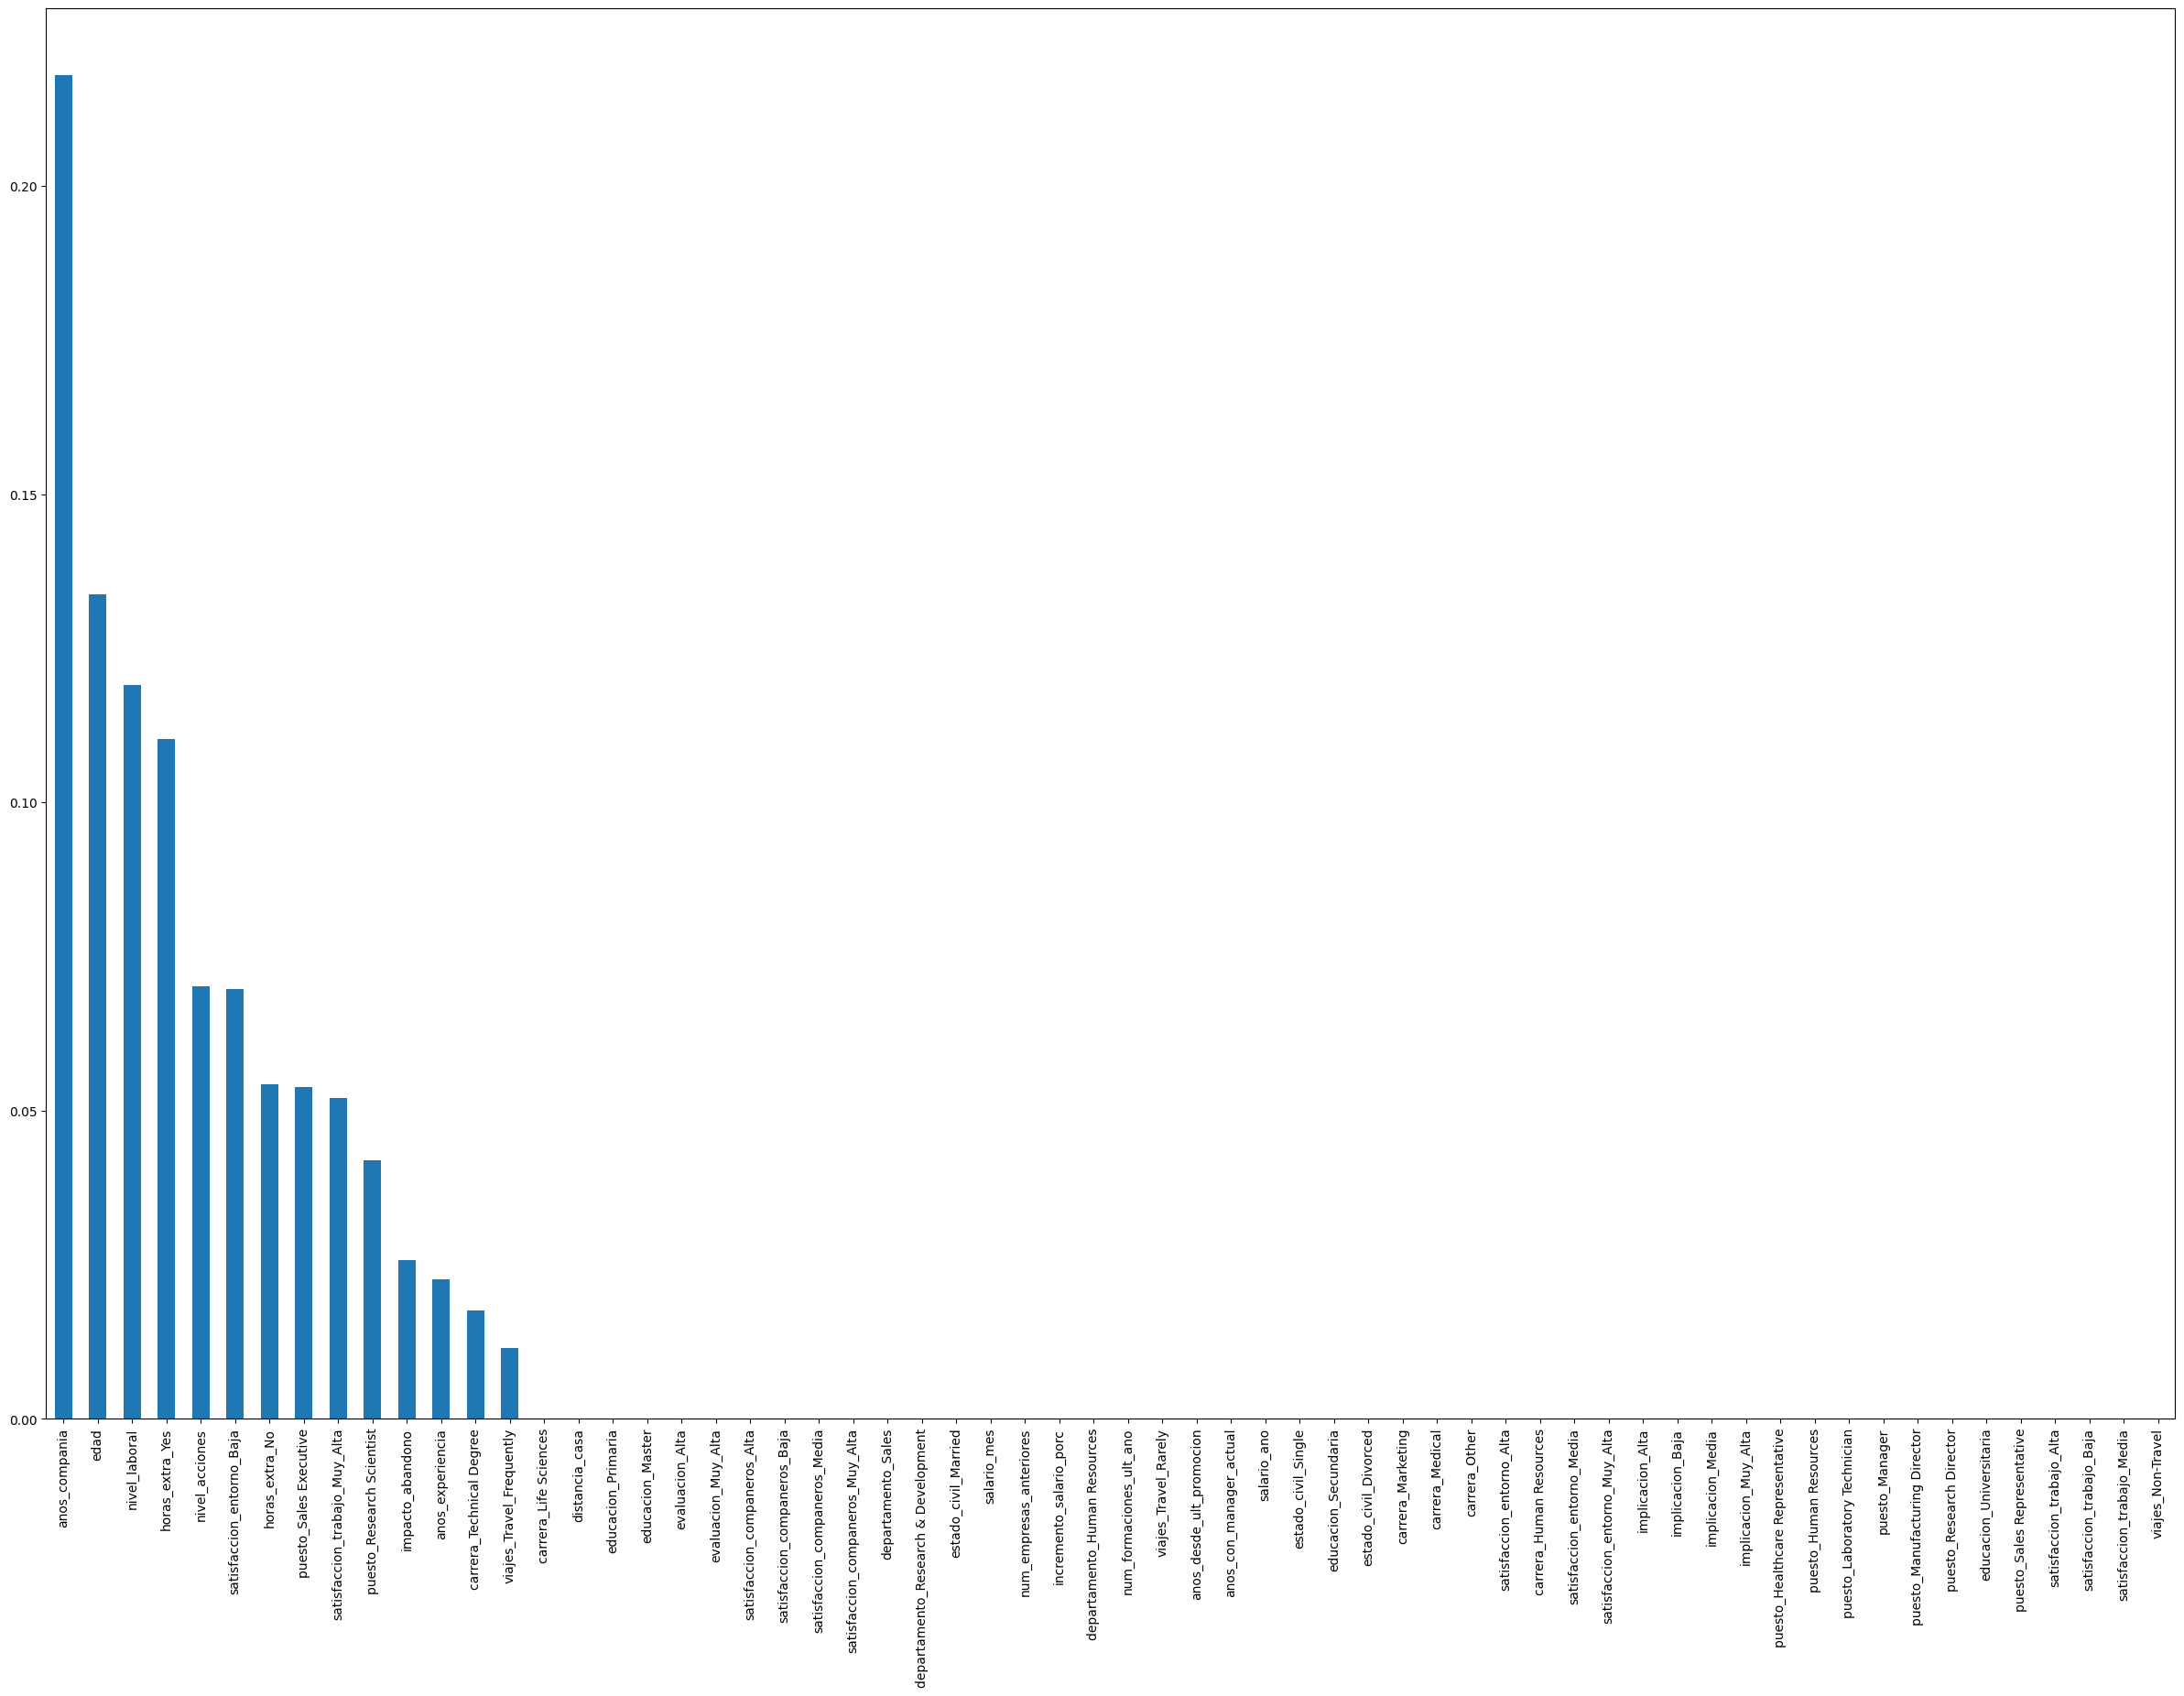

In [ ]:
pd.Series(ac.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20))

##EXPLOTACIÓN DE LA INFORMACIÓN

In [ ]:
df['scoring_abandono'] = ac.predict_proba(df_ml.drop(columns = 'abandono'))[:,1]
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.301887
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.125000
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.266667
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.538462
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.279070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.125000
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.053279
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.058252


Ejemplo de los 10 empleados con mayor probabilidad de dejar la empresa

In [ ]:
df.sort_values(by = 'scoring_abandono', ascending = False)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
337,31,0,Travel_Frequently,Research & Development,3,Universitaria,Medical,Media,Alta,3,...,Baja,1,9,3,2,2,2,164100,34461.000,1.0
2027,29,1,Travel_Rarely,Research & Development,1,Universitaria,Medical,Baja,Alta,1,...,Media,3,4,3,2,2,2,57444,11718.576,1.0
1645,35,1,Travel_Rarely,Sales,15,Primaria,Medical,Baja,Baja,2,...,Muy_Alta,2,7,2,2,2,2,65280,13317.120,1.0
64,48,1,Travel_Rarely,Research & Development,1,Secundaria,Life Sciences,Baja,Media,3,...,Muy_Alta,0,23,2,1,0,0,64572,13172.688,1.0
1968,53,1,Travel_Rarely,Sales,24,Universitaria,Life Sciences,Baja,Alta,3,...,Media,0,15,2,2,2,2,125376,26328.960,1.0
1479,30,0,Travel_Rarely,Sales,16,Universitaria,Life Sciences,Muy_Alta,Alta,2,...,Alta,2,4,2,2,2,2,63612,12976.848,1.0
1108,33,1,Travel_Rarely,Research & Development,25,Secundaria,Medical,Baja,Media,1,...,Media,0,5,0,2,2,2,27756,4468.716,1.0
1837,58,0,Travel_Frequently,Research & Development,15,Universitaria,Life Sciences,Baja,Alta,4,...,Media,0,23,3,2,2,2,189444,39783.240,1.0
366,29,0,Travel_Rarely,Sales,2,Secundaria,Medical,Baja,Media,2,...,Media,2,10,2,0,0,0,79728,16742.880,1.0


Ejemplo del riesgo de dejar la empresa por puesto de trabajo

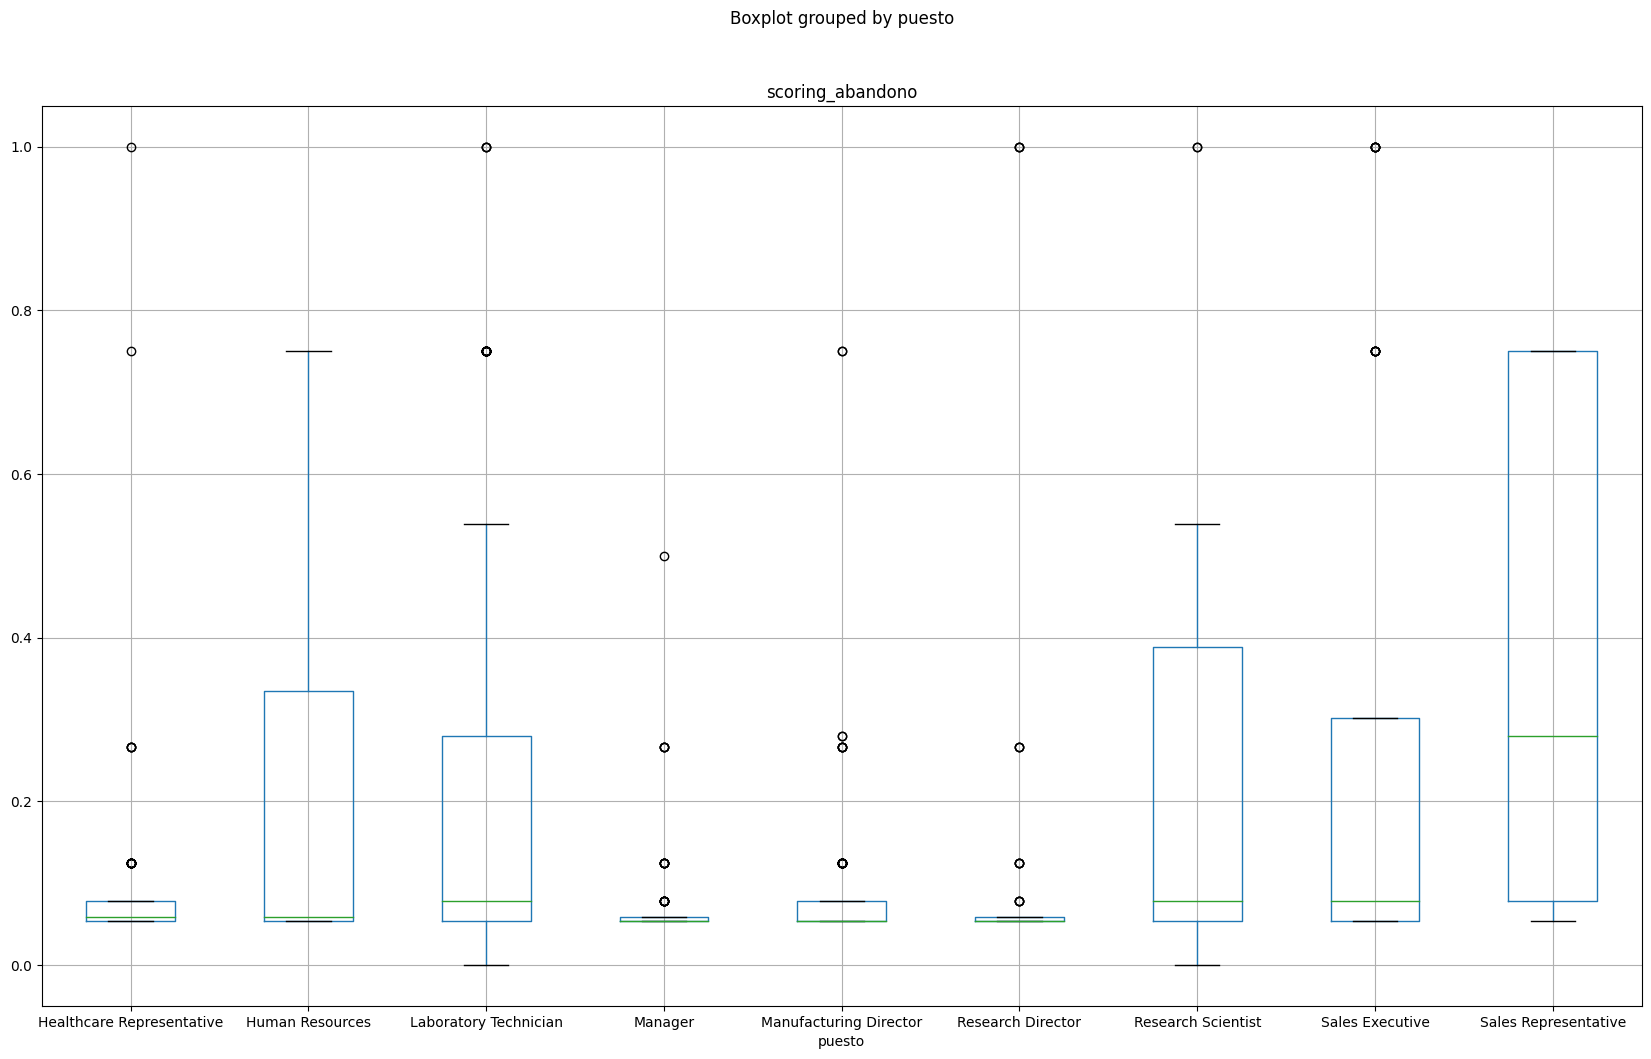

In [ ]:
df.boxplot(column='scoring_abandono', by = 'puesto', figsize=(20,12));

##GUARDAR EL RESULTADO

In [ ]:


df.to_excel('abandono_con_scoring.xlsx')
files.download('abandono_con_scoring.xlsx')